# K-Means Clustering

## Importing the libraries

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [94]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [96]:
print("missing values in each column",dataset.isna().sum())

missing values in each column CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [98]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [100]:
X = dataset.drop(['CustomerID'], axis=1)

**spending score categories**
- Low: 0–40

- Medium: 41–70

- High: 71–100

- **cross tab  shows the frequency (count) of occurrences for each combination of categories**
- **Binning  is the process of converting continuous numerical data into categorical intervals (bins)**

In [103]:
bins=[0,40,70,100]
labels=['Low','Medium','High']
pd.crosstab(dataset['Gender'],pd.cut(dataset['Spending Score (1-100)'],bins=bins,labels=labels))

Spending Score (1-100),Low,Medium,High
Gender,,,
Female,34,46,32
Male,29,37,22


In [105]:
#optional
X['Gender']=X['Gender'].map({'Male':0,'Female':1})

corr_matrix=X.corr(numeric_only=True)
print(corr_matrix)

                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000 -0.060867           -0.056410   
Age                    -0.060867  1.000000           -0.012398   
Annual Income (k$)     -0.056410 -0.012398            1.000000   
Spending Score (1-100)  0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                                0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [107]:
#correlation between numerical columns
num_col=X.select_dtypes(include=['number'])
corr_matrix=num_col.corr()
print(corr_matrix)

                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000 -0.060867           -0.056410   
Age                    -0.060867  1.000000           -0.012398   
Annual Income (k$)     -0.056410 -0.012398            1.000000   
Spending Score (1-100)  0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                                0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [109]:
X.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [111]:
X = X.iloc[:, [2, 3]].values#select all the rows and columns at index 2 and 3

## Using the elbow method to find the optimal number of clusters
- WCSS decreases rapidly initially and then begins to decrease more slowly. 
- The point where the decrease starts to slow down is referred to as the elbow

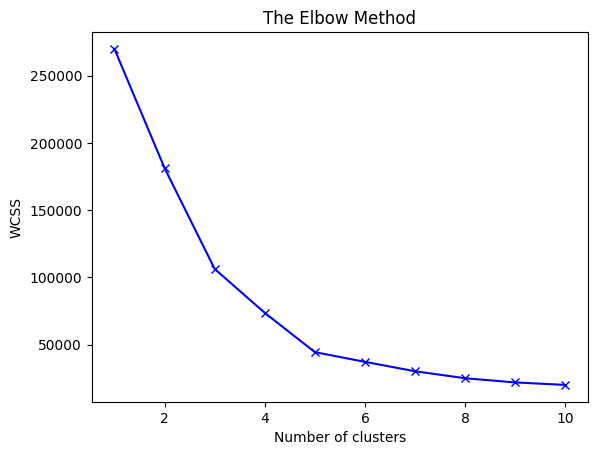

In [114]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10,random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset
**kmeans ++ is an enhanced version of kmeans clustering.**
- it chooses the initial centroids in a way that maximizes the distance between them
- n_init-This means the KMeans algorithm will run 10 times with different **random initializations of centroid**

In [151]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=10,random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters
**y_kmeans == i filters the data to select the points that belong to cluster i (0, 1, 2, 3, or 4).**
- s specifies the size of point in the plot
- kmeans.cluster_centers_[:,0] and kmeans.cluster_Centers_[:,1] selects the x and y coordinates of centroids.

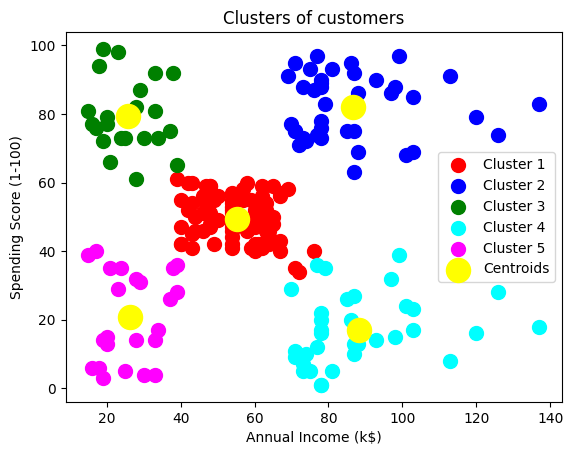

In [154]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters**

- A score close to +1 indicates that the points are well-clustered and the clustering structure is good.

- A score close to 0 indicates overlapping clusters, meaning that the points are on or very close to the decision boundary between clusters.

- A score close to -1 indicates that the points are likely assigned to the wrong cluster

In [157]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score for k=5: {score:.2f}')

Silhouette Score for k=5: 0.55
